In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import scipy.spatial
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import finesse
import finesse.ligo
from finesse.cymath.homs import HGModes

import func_funs as ff
import graph_funs as grf
import finesse3_funs as f3f
import wolfram_funs as wlf
import debug_funs as dgf

import networkx as nx
import pygraphviz as pgv
import pydot

from multimethod import multimethod

from IPython.display import Image, SVG

import inspect
import types

In [3]:
code = '''
variable Larm 3994

laser L0 P=1

s sPRCin L0.p1 ITMY.p1
m ITMY T=0.014 L=0 Rc=[-1934, -1934]
s LY ITMY.p2 ETMY.p1 L=&Larm
m ETMY T=5u L=0 Rc=[2245, 2245]

cav ARMY ITMY.p2.o

modes(maxtem=4)
'''

kat = finesse.Model()
kat.parse(code)

kat.add_fd_to_every_node()
kat.phase_config.ZERO_K00 = False
kat.phase_config.ZERO_TEM00_GOUY = False

run = kat.run()

In [4]:
@multimethod
def get_source_field(obj: finesse.components.Laser):
    return obj.get_output_field(kat.homs)

@multimethod
def get_source_field(obj: finesse.element.ModelElement):
    return np.zeros(len(kat.homs), dtype=complex)

In [5]:
sim = f3f.LCTSimulation(kat, LCT_params=lctf.LCTNodeParams(N=51, s=4))

In [13]:
f3f.scalar_rhs_vec(kat, sim.G, sim.G.nodes)

KeyError: 0

In [6]:
sim.prepare_LCT_solve()

True

In [7]:
grf.get_paths(sim.G, 'ITMY.p2.o',  'ITMY.p1.i')

[['ITMY.p2.o', None, 'ITMY.p1.i']]

In [8]:
M, rhs = f3f.get_scalar_matrix_vec(kat, sim.G, list(sim.G.nodes))

In [10]:
M

array([[0, 0, 0, <Symbolic='(0+(1+0j))' @ 0x7fb5d05b3340>, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, <Symbolic='(0+(1+0j))' @ 0x7fb5a6695760>, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0,
        <Symbolic='(0+sqrt(ITMY.R)*exp(1j*ITMY.phi/90*3.141592653589793))' @ 0x7fb5a66c6b20>,
        0, <Symbolic='(0+1j*sqrt(ITMY.T))' @ 0x7fb5a66c6f70>, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, <Symbolic='(0+(1+0j))' @ 0x7fb5a66c6af0>, 0, 0],
       [0, 0, <Symbolic='(0+1j*sqrt(ITMY.T))' @ 0x7fb5a66c6d90>, 0,
        <Symbolic='(0+sqrt(ITMY.R)*exp((-0-1j)*ITMY.phi/90*3.141592653589793))' @ 0x7fb5a66959d0>,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, <Symbolic='(0+(1+0j))' @ 0x7fb5a6695cd0>, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,
        <Symbolic='(0+sqrt(ETMY.R)*exp(1j*ETMY.phi/90*3.141592653589793))' @ 0x7fb5a66c42b0>,
        0, <Symbolic='(0+1j*sqrt(ETMY.T))' @ 0x7fb5a66c4d30>, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,
        <Symbolic='(0

In [11]:
f3f.map_eval(rhs)

array([ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j])

In [133]:
list(sim.G.nodes)

['L0.p1.i',
 'L0.p1.o',
 'ITMY.p1.i',
 'ITMY.p1.o',
 'ITMY.p2.i',
 'ITMY.p2.o',
 'ETMY.p1.i',
 'ETMY.p1.o',
 'ETMY.p2.i',
 'ETMY.p2.o']

In [149]:
path = [['L0.p1.o', 'L0.p1.o']]

In [161]:
tcg = nx.transitive_closure(sim.G, reflexive=True)

In [162]:
grf.adjacency_matrix(tcg)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [153]:
f3f.get_edge(kat.optical_network, *path[0])

L0.p1.o L0.p1.o


KeyError: 'Key L0.p1.o not found'

In [150]:
f3f.get_path_operator(kat, path)

TypeError: reduce() of empty sequence with no initial value

In [147]:
grf.get_incoming_paths(sim.G, 'ITMY.p1.o')

[['ITMY.p1.i', 'ITMY.p1.o'], ['ITMY.p2.i', 'ITMY.p1.o']]

In [136]:
sim.planewave_solve_G()[2]

(1+0j)

In [113]:
rhs

array([ <Symbolic='1.0*(1+0j)*sqrt(L0.P)*exp(1j*L0.phase/180*3.141592653589793)' @ 0x7fa29e44f820>,
       0.0, 0.0, 0.0, 0.0,
       <Symbolic='1.0*1j*sqrt(ETMY.T)*0' @ 0x7fa2bf8bbc70>], dtype=object)

In [112]:
_

['ITMY.p1.i', 'ITMY.p1.o', 'ITMY.p2.i', 'ITMY.p2.o', 'ETMY.p1.i', 'ETMY.p1.o']

In [96]:
f3f.map_eval(M)

TypeError: can't convert complex to int

In [91]:
np.eye(len(M))

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

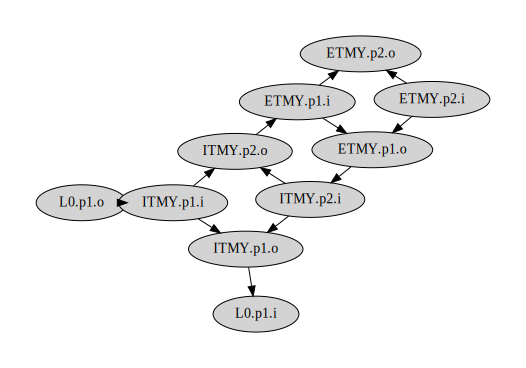

In [67]:
grf.drawing.graphviz_draw(sim.G, draw_orphans=True)

In [31]:
sim.prepare_LCT_rhs()

True

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

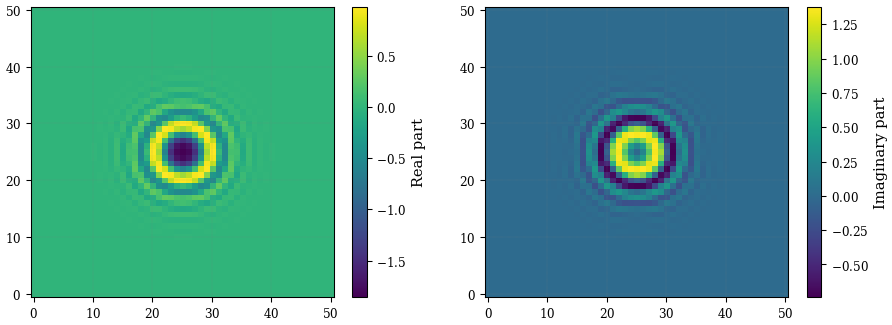

In [38]:
mpf.complex_imshow(sim.solve_LCT()[0])

In [ ]:
M, rhs, _ = f3f.get_scalar_matrix_vec(kat, RG)

IA = np.eye(2) - f3f.map_eval(M)
v = f3f.map_eval(rhs)

scalar_solve = np.linalg.solve(IA, v)
scalar_solve